In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests
from io import BytesIO
import warnings

In [2]:
aave = pd.read_csv('https://raw.githubusercontent.com/gabrielxvnx/M3_GRUPO/main/data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/gabrielxvnx/M3_GRUPO/raw/main/data/coin_XRP.csv')


In [3]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)

In [4]:
#Convertendo para conter somente a Data
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date

In [5]:
# Removendo Colunas que não utilizaremos
del cripto['SNo']

In [6]:
## Traduzindo Colunas
traducao = {"Name": "Nome",
            "Date": "Data",
            "High": "Alta",
            "Low": "Baixa",
            "Open": "Abertura",
            "Close": "Fechamento",
            "Volume": "Volume",
            "Symbol": "Simbolo",
            "Marketcap": "Marketcap",} # Gerando dicionario para tradução
cripto.rename(columns=traducao, inplace=True)# Renomeando

In [7]:
cripto.dtypes

Nome           object
Simbolo        object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

In [8]:
format = lambda x: '%.2f' % x # %x (aplica no x)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].astype(float) # Reformatando

In [9]:
cripto.dtypes

Nome           object
Simbolo        object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

In [10]:
cripto_10 = ['Aave',
'Binance Coin',
'Cardano',
'Dogecoin',
'Ethereum',
'Litecoin',
'Monero',
'Polkadot',
'Stellar',
'Uniswap'
]

In [11]:
criptocopy = cripto[cripto['Nome'].isin(cripto_10)].reset_index(drop=True)
criptocopy

,Nome,Simbolo,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,AAVE,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
16738,Uniswap,UNI,2021-07-02,18.24,16.98,17.83,18.24,3.070457e+08,1.049364e+10
16739,Uniswap,UNI,2021-07-03,19.52,17.85,18.23,19.52,3.448554e+08,1.146609e+10
16740,Uniswap,UNI,2021-07-04,21.48,18.95,19.48,20.77,5.404909e+08,1.219861e+10
16741,Uniswap,UNI,2021-07-05,20.87,19.18,20.77,20.10,5.452744e+08,1.180130e+10


In [12]:
criptocopy['Nome'].unique() # Verificando as moedas selecionadas

array(['Aave', 'Binance Coin', 'Cardano', 'Dogecoin', 'Ethereum',
       'Litecoin', 'Monero', 'Polkadot', 'Stellar', 'Uniswap'],
      dtype=object)

In [13]:
df = criptocopy.copy()

daniel

# Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?

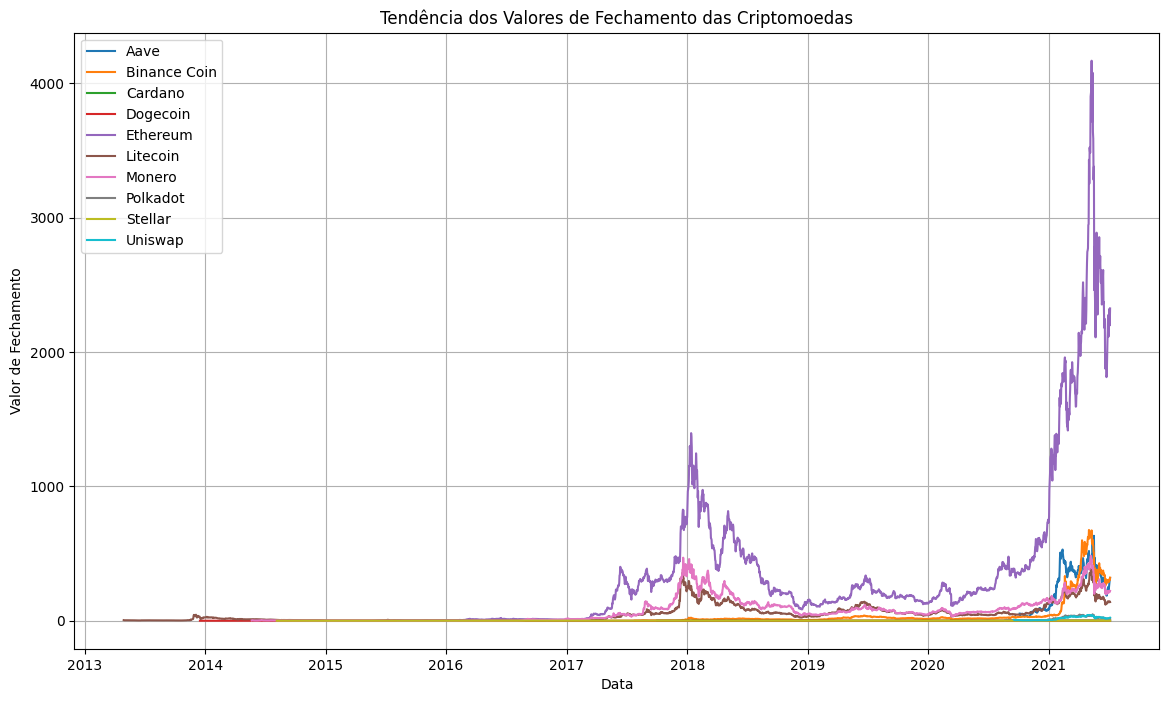

In [14]:
df_agrupado = df.groupby(['Nome', 'Data'])['Fechamento'].mean().reset_index()
df_agrupado

plt.figure(figsize=(14, 8))
for crypto in df['Nome'].unique():
    crypto_data = df_agrupado[df_agrupado['Nome'] == crypto]
    plt.plot(crypto_data['Data'], crypto_data['Fechamento'], label=crypto)

plt.title('Tendência dos Valores de Fechamento das Criptomoedas')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

**Função para calcular a tendência (diferença percentual entre o valor inicial e final)**

In [15]:
def calcular_tendencia(data):
    valor_inicial = data.iloc[0]
    valor_final = data.iloc[-1]
    tendencia = (valor_final - valor_inicial) / valor_inicial * 100
    return tendencia

**Calcular e exibir a tendência para cada criptomoeda**


In [16]:
tendencia = df.groupby('Nome')['Fechamento'].apply(calcular_tendencia).reset_index()
tendencia.columns = ['Criptomoeda', 'Tendência (%)']

tendencia

<ipython-input-15-e5eb9f588764>:4: RuntimeWarning: divide by zero encountered in scalar divide
  tendencia = (valor_final - valor_inicial) / valor_inicial * 100


,Criptomoeda,Tendência (%)
0,Aave,4.954528e+02
1,Binance Coin,2.916545e+05
2,Cardano,4.633333e+03
3,Dogecoin,inf
4,Ethereum,3.098573e+05
5,Litecoin,3.073288e+03
6,Monero,1.047810e+04
7,Polkadot,4.604167e+02
8,Stellar,inf
9,Uniswap,2.246377e+02


# Quais os valores médios para todas as criptomoedas?


In [17]:
valores_medios = df.groupby('Nome').agg({
    'Alta': 'mean',
    'Baixa': 'mean',
    'Abertura': 'mean',
    'Fechamento': 'mean',
    'Volume': 'mean',
    'Marketcap': 'mean'
}).reset_index()

valores_medios.columns = ['Criptomoeda', 'Alta Média', 'Baixa Média', 'Abertura Média', 'Fechamento Médio', 'Volume Médio', 'Marketcap Médio']

valores_medios

,Criptomoeda,Alta Média,Baixa Média,Abertura Média,Fechamento Médio,Volume Médio,Marketcap Médio
0,Aave,271.306691,237.736109,254.506764,255.525782,5.023421e+08,3.168639e+09
1,Binance Coin,54.764202,49.165735,52.028329,52.250319,6.269804e+08,7.835575e+09
2,Cardano,0.269607,0.239716,0.255124,0.256179,8.934183e+08,7.603454e+09
3,Dogecoin,0.013841,0.011308,0.012565,0.012659,4.326321e+08,1.760533e+09
4,Ethereum,398.258583,365.592560,382.879907,383.910727,7.057058e+09,4.172084e+10
5,Litecoin,51.344373,46.931227,49.247315,49.279017,1.284851e+09,2.934139e+09
6,Monero,77.357606,70.481368,74.069228,74.134712,1.637467e+08,1.236534e+09
7,Polkadot,19.131531,16.957344,18.107344,18.143031,2.006507e+09,1.653354e+10
8,Stellar,0.106110,0.095018,0.100582,0.100677,2.515161e+08,2.019410e+09
9,Uniswap,18.091199,15.934623,17.014658,17.077329,1.061551e+09,7.950668e+09


# Em quais anos houve maiores quedas e valorizações?


In [18]:
df['Data'] = pd.to_datetime(df['Data'])

df['Ano'] = df['Data'].dt.year

variacao_anual = df.groupby(['Nome', 'Ano']).agg({
    'Abertura': 'first',
    'Fechamento': 'last'
}).reset_index()

variacao_anual['variação_anual'] = ((variacao_anual['Fechamento'] - variacao_anual['Abertura']) / variacao_anual['Abertura']) * 100

max_valorizacao = variacao_anual.loc[variacao_anual.groupby('Nome')['variação_anual'].idxmax()]

max_queda = variacao_anual.loc[variacao_anual.groupby('Nome')['variação_anual'].idxmin()]

In [19]:
max_valorizacao

,Nome,Ano,Abertura,Fechamento,variação_anual
1,Aave,2021,87.54,316.90,262.005940
2,Binance Coin,2017,0.11,8.64,7754.545455
7,Cardano,2017,0.02,0.72,3500.000000
16,Dogecoin,2017,0.00,0.01,inf
23,Ethereum,2017,7.98,756.73,9382.832080
32,Litecoin,2017,4.33,232.10,5260.277136
39,Monero,2016,0.47,13.78,2831.914894
45,Polkadot,2020,2.90,9.29,220.344828
47,Stellar,2014,0.00,0.01,inf
56,Uniswap,2021,5.17,22.40,333.268859


In [20]:
max_queda

,Nome,Ano,Abertura,Fechamento,variação_anual
0,Aave,2020,52.68,87.53,66.154138
3,Binance Coin,2018,8.63,6.16,-28.621089
8,Cardano,2018,0.72,0.04,-94.444444
17,Dogecoin,2018,0.01,0.00,-100.000000
24,Ethereum,2018,755.76,133.37,-82.352863
29,Litecoin,2014,24.35,2.72,-88.829569
41,Monero,2018,349.55,46.23,-86.774424
46,Polkadot,2021,9.29,16.14,73.735199
48,Stellar,2015,0.01,0.00,-100.000000
55,Uniswap,2020,3.49,5.17,48.137536


# Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [21]:
df['dia_da_semana'] = df['Data'].dt.day_name()

df['variação_diária'] = ((df['Fechamento'] - df['Abertura']) / df['Abertura']) * 100

variadao_media_diaria = df.groupby('dia_da_semana')['variação_diária'].mean().reset_index()

ordenar_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
variadao_media_diaria['dia_da_semana'] = pd.Categorical(variadao_media_diaria['dia_da_semana'], categories=ordenar_dias, ordered=True)
variadao_media_diaria = variadao_media_diaria.sort_values('dia_da_semana')

variadao_media_diaria

,dia_da_semana,variação_diária
1,Monday,NaN
5,Tuesday,NaN
6,Wednesday,NaN
4,Thursday,NaN
0,Friday,NaN
2,Saturday,NaN
3,Sunday,0.345437


# Quais criptomoedas apresentaram maior volatilidade ao longo do período analisado?

In [22]:
df = df.sort_values(by=['Nome', 'Data'])
df['retorno_diário'] = df.groupby('Nome')['Fechamento'].pct_change()
volatilidade = df.groupby('Nome')['retorno_diário'].std().reset_index()
volatilidade.columns = ['Nome', 'volatilidade']
volatilidade = volatilidade.sort_values(by='volatilidade', ascending=False)

volatilidade

,Nome,volatilidade
2,Cardano,0.101661
9,Uniswap,0.091281
7,Polkadot,0.087089
0,Aave,0.086547
1,Binance Coin,0.080024
6,Monero,0.070127
5,Litecoin,0.068523
4,Ethereum,0.063074
3,Dogecoin,NaN
8,Stellar,NaN


### Moeda mais e menos interessante

In [23]:
df['valorizacao'] = ((df['Fechamento'] - df['Abertura']) / df['Abertura']) * 100

moeda_mais_interessante = df.loc[df['valorizacao'].idxmax()]
moeda_menos_interessante = df.loc[df['valorizacao'].idxmin()]

# Tabela com os resultados
resultado_valorizacao = pd.DataFrame({
    'Moeda': [moeda_mais_interessante['Nome'], moeda_menos_interessante['Nome']],
    'Valorização (%)': [moeda_mais_interessante['valorizacao'], moeda_menos_interessante['valorizacao']]
}, index=['Melhor', 'Pior'])

print("Tabela com a valorização das moedas:")
print(resultado_valorizacao)

Tabela com a valorização das moedas:
           Moeda  Valorização (%)
Melhor  Dogecoin              inf
Pior    Dogecoin           -100.0
